# Support Vector Mechine

Install package pandoc

In [1]:
!apt-get install pandoc

##### (1) Inputkan data sentimenolah.xlsx dalam bentuk excel

In [2]:
!pip install pandas

In [3]:
!pip install xlrd

In [354]:
import pandas as pd
data = pd.read_excel('../sentimenolahfix.xlsx')
data.head()

,Data,Kategori
0,RT @biarinajadech @fitriana10_eni @digeeembok ...,negatif
1,Kerjaan gue membutuhkan pindah2 kota dan biasa...,positif
2,Salah satunya adalah penghargaan Best Cabin Cr...,positif
3,terimakasih @IndonesiaGaruda selama penerbanga...,positif
4,"Walaupun udah lama ga naik pesawat, setidaknya...",positif


###### (2) Melihat banyaknya data

In [355]:
data.shape #melihat jumlah baris dan kolom

(329, 2)

###### (3) Mengubah urutan data

In [356]:
col = ['Kategori', 'Data']
data = data[col]

###### 4) Melihat nama variabel

In [357]:
data.columns

Index(['Kategori', 'Data'], dtype='object')

##### (5) Menambahkan kategori menjadi data kategorik dengan nama kategori_id

In [358]:
data['kategori_id'] = data['Kategori'].factorize()[0]
from io import StringIO
kategori_id_data = data[['Kategori', 'kategori_id']].drop_duplicates().sort_values('kategori_id')
kategori_to_id = dict(kategori_id_data.values)
id_to_kategori = dict(kategori_id_data[['kategori_id', 'Kategori']].values)

In [359]:
data.head()

,Kategori,Data,kategori_id
0,negatif,RT @biarinajadech @fitriana10_eni @digeeembok ...,0
1,positif,Kerjaan gue membutuhkan pindah2 kota dan biasa...,1
2,positif,Salah satunya adalah penghargaan Best Cabin Cr...,1
3,positif,terimakasih @IndonesiaGaruda selama penerbanga...,1
4,positif,"Walaupun udah lama ga naik pesawat, setidaknya...",1



##### (6) Lower Casing

In [360]:
label = data.Kategori
label

0      negatif
1      positif
2      positif
3      positif
4      positif
        ...   
324    positif
325    positif
326    positif
327    negatif
328    positif
Name: Kategori, Length: 329, dtype: object

In [361]:
data1 = data.Data
data1

0      RT @biarinajadech @fitriana10_eni @digeeembok ...
1      Kerjaan gue membutuhkan pindah2 kota dan biasa...
2      Salah satunya adalah penghargaan Best Cabin Cr...
3      terimakasih @IndonesiaGaruda selama penerbanga...
4      Walaupun udah lama ga naik pesawat, setidaknya...
                             ...                        
324    RT @IndonesiaGaruda: Dalam rangka peningkatan ...
325    RT @IndonesiaGaruda terimakasih informasinya m...
326                 RT @IndonesiaGaruda makasi infonya?'
327            RT @IndonesiaGaruda jadi hobi delay nih?'
328    RT @IndonesiaGaruda: Beberapa langkah lainnya ...
Name: Data, Length: 329, dtype: object

In [362]:
import re
def cleaning(str):
    #remove URLs
    str = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', str)     
    #Remove #word
    str = re.sub(r'#([^\s]+)', ' ', str)
    #remove @username
    str = re.sub(r'@[^\s]+',' ',str)
    #remove \...
    str = re.sub(r'\\[^\s]+',' ',str)
    #remove rt
    str = re.sub(r"rt ", ' ', str)
    #remove punctuations
    str = re.sub(r'[^\w]|_',' ',str)
    #Remove additional white spaces
    str = re.sub(r'[\s]+', ' ', str)
    #Remove tanda baca
    #str = re.sub(r'[^\w\s]',' ', str)
    #str = re.sub(r'[\x80-\xf0]+',' ', str)
    #str = re.sub(r'[\\x00-\\x7f]+',' ', str)
    #str = re.sub(r'[^\w\d\s\~\.\,\;\:\?\!\(\)\~"\']+',' ', str)

     
    return str

In [363]:
def preprocessing(str):
    str = cleaning(str)
    return str

In [364]:
prepros = []
for i in data1:
    a = preprocessing(i)
    prepros.append(a)

In [365]:
data = pd.DataFrame({"Data":prepros, "Kategori":label})
data

,Data,Kategori
0,RT Yg penerbangan durasi sejaman dikasi roti g...,negatif
1,Kerjaan gue membutuhkan pindah2 kota dan biasa...,positif
2,Salah satunya adalah penghargaan Best Cabin Cr...,positif
3,terimakasih selama penerbangan jadi engga bose...,positif
4,Walaupun udah lama ga naik pesawat setidaknya ...,positif
...,...,...
324,RT Dalam rangka peningkatan layanan pada tangg...,positif
325,RT terimakasih informasinya min,positif
326,RT makasi infonya,positif
327,RT jadi hobi delay nih,negatif


##### Menyinpan Data yang telah di preprocessing dengan Lower Casing 

In [366]:
from xlsxwriter.utility import xl_rowcol_to_cell
saveresult = pd.ExcelWriter('savelow.xlsx', engine='xlsxwriter')
data['Data'].to_excel(saveresult, index=False, sheet_name='report')
saveresult.save()

##### (8) Stopword

In [111]:
#link https://github.com/har07/PySastrawi
!pip install Sastrawi

In [367]:
#stopword sastrawi di link  'https://devtrik.com/python/stopword-removal-bahasa-indonesia-python-sastrawi/'
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [368]:
# import StopWordRemoverFactory class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
stopword =  factory.get_stop_words()
 
# Kalimat
data['Data'] = data['Data'].apply(lambda x: " ".join(x for x in x.split() if x not in stopword))
data['Data'].head()

0    RT Yg penerbangan durasi sejaman dikasi roti g...
1    Kerjaan gue membutuhkan pindah2 kota biasanya ...
2    Salah satunya penghargaan Best Cabin Crew Makl...
3    terimakasih selama penerbangan jadi engga bose...
4    Walaupun udah lama ga naik pesawat ngerasakan ...
Name: Data, dtype: object

In [114]:
!pip install requests

In [369]:
import requests
def stopwords():
    r = requests.get("https://raw.githubusercontent.com/masdevid/ID-Stopwords/master/id.stopwords.02.01.2016.txt").text
    data = []
    for x in r.split("\n"):
        data.append(x)
    return data

In [370]:
stopwords()

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [371]:
# Import Stopword Factory class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

#Create factory
factory = StopWordRemoverFactory()
more_stopword = ['hm','yah','mmm','ok','ga','alaah','Y','tks','pgi','eh','Wokeee','uhhh','thx','kwlwkwkwkkwkwkw','eh','zzz','fa','cai','hm','gg','wkwk','hm','b' ]

# Tambahkan Stopword Baru
stopwordplus = factory.get_stop_words()+stopwords()+more_stopword

#data['Pertanyaan'] = data['Pertanyaan'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwordplus))
#data['Pertanyaan']

In [372]:
stopwordplus

['yang',
 'untuk',
 'pada',
 'ke',
 'para',
 'namun',
 'menurut',
 'antara',
 'dia',
 'dua',
 'ia',
 'seperti',
 'jika',
 'jika',
 'sehingga',
 'kembali',
 'dan',
 'tidak',
 'ini',
 'karena',
 'kepada',
 'oleh',
 'saat',
 'harus',
 'sementara',
 'setelah',
 'belum',
 'kami',
 'sekitar',
 'bagi',
 'serta',
 'di',
 'dari',
 'telah',
 'sebagai',
 'masih',
 'hal',
 'ketika',
 'adalah',
 'itu',
 'dalam',
 'bisa',
 'bahwa',
 'atau',
 'hanya',
 'kita',
 'dengan',
 'akan',
 'juga',
 'ada',
 'mereka',
 'sudah',
 'saya',
 'terhadap',
 'secara',
 'agar',
 'lain',
 'anda',
 'begitu',
 'mengapa',
 'kenapa',
 'yaitu',
 'yakni',
 'daripada',
 'itulah',
 'lagi',
 'maka',
 'tentang',
 'demi',
 'dimana',
 'kemana',
 'pula',
 'sambil',
 'sebelum',
 'sesudah',
 'supaya',
 'guna',
 'kah',
 'pun',
 'sampai',
 'sedangkan',
 'selagi',
 'sementara',
 'tetapi',
 'apakah',
 'kecuali',
 'sebab',
 'selain',
 'seolah',
 'seraya',
 'seterusnya',
 'tanpa',
 'agak',
 'boleh',
 'dapat',
 'dsb',
 'dst',
 'dll',
 'dahulu

##### (9) tifdf

In [373]:
import warnings
warnings.filterwarnings('ignore')

In [374]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(encoding='latin-1', ngram_range=(1, 1), tokenizer=None, analyzer = 'word', stop_words=stopwordplus)
countvec = count_vectorizer.fit_transform(data.Data).toarray()
countvec

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [375]:
countvec2 = pd.DataFrame(countvec)
countvec2

,0,1,2,3,4,5,6,7,8,9,...,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [376]:
kata_kata = count_vectorizer.get_feature_names()
kata_kata

['000',
 '01',
 '02',
 '05',
 '10',
 '1000',
 '100rb',
 '10kg',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '1minggu',
 '20',
 '2020',
 '207',
 '22',
 '25',
 '28',
 '28h',
 '29a',
 '2thn',
 '30',
 '305',
 '31',
 '35',
 '3x',
 '40',
 '439',
 '45',
 '47',
 '48',
 '50',
 '500rb',
 '612',
 '647',
 '71',
 '71st',
 '71th',
 '800',
 '80ribu',
 '873',
 '981',
 'abis',
 'ac',
 'aceh',
 'addie',
 'adem',
 'adi',
 'admin',
 'aero',
 'agent',
 'ah',
 'air',
 'airbus',
 'airbusnya',
 'airbuss',
 'airline',
 'airlines',
 'airport',
 'aja',
 'akal',
 'akun',
 'albumnya',
 'alesan',
 'alhamdulillah',
 'alihkan',
 'allhamdulillah',
 'amaze',
 'ambon',
 'amdeus',
 'ampamsterdam',
 'ampat',
 'amq',
 'ams',
 'amsterdam',
 'and',
 'android',
 'anniversary',
 'apa2an',
 'apanya',
 'aplikasi',
 'aplimasi',
 'app',
 'appreciate',
 'apps',
 'appsmu',
 'appsnya',
 'apresiasi',
 'aqua',
 'arah',
 'aseli',
 'ashiaap',
 'asia',
 'at',
 'ata',
 'atambua',
 'ato',
 'audio',
 'australia',
 'awak',

In [377]:
countvec3 = pd.DataFrame(countvec, columns=kata_kata)
countvec3

,000,01,02,05,10,1000,100rb,10kg,11,12,...,wisatawan,wkwwk,yaa,yaaa,yaampun,yak,yanh,yg,you,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [378]:
from xlsxwriter.utility import xl_rowcol_to_cell
saveresult = pd.ExcelWriter('saveresult2.xlsx', engine='xlsxwriter')
countvec3.to_excel(saveresult, index=False, sheet_name='report')
saveresult.save()

In [379]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(norm=None, use_idf=True, smooth_idf=False, sublinear_tf=False)
tfidf = transformer.fit_transform(countvec)
tfidf

<329x1077 sparse matrix of type '<class 'numpy.float64'>'
	with 2512 stored elements in Compressed Sparse Row format>

In [380]:
tfidf1 = tfidf.toarray()
tfidf1

array([[0.        , 0.        , 0.        , ..., 3.29955019, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [381]:
tfidf2 = pd.DataFrame(tfidf1)
tfidf2

,0,1,2,3,4,5,6,7,8,9,...,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.29955,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0


In [382]:
kata_kata2 = count_vectorizer.get_feature_names()

In [383]:
df1 = pd.DataFrame(tfidf1, columns=kata_kata2)
df1

,000,01,02,05,10,1000,100rb,10kg,11,12,...,wisatawan,wkwwk,yaa,yaaa,yaampun,yak,yanh,yg,you,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.29955,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0


In [384]:
from xlsxwriter.utility import xl_rowcol_to_cell
savedf1 = pd.ExcelWriter('savdf1.xlsx', engine='xlsxwriter')
df1.to_excel(savedf1, index=False, sheet_name='report')
savedf1.save()

In [385]:
data['kategori_id'] = data['Kategori'].factorize()[0]
from io import StringIO
kategori_id_data = data[['Kategori', 'kategori_id']].drop_duplicates().sort_values('kategori_id')
kategori_to_id = dict(kategori_id_data.values)
id_to_kategori = dict(kategori_id_data[['kategori_id', 'Kategori']].values)

In [386]:
result = pd.concat([data['kategori_id'],df1], axis=1)
result

,kategori_id,000,01,02,05,10,1000,100rb,10kg,11,...,wisatawan,wkwwk,yaa,yaaa,yaampun,yak,yanh,yg,you,youtube
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.29955,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
325,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
326,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
327,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0


##### Save data yang telah di proses TF-IDF

In [387]:
#untuk menyimpan hasil cell output result menjadi format excel
#link http://pbpython.com/improve-pandas-excel-output.html
from xlsxwriter.utility import xl_rowcol_to_cell
saveresult = pd.ExcelWriter('saveresult21.xlsx', engine='xlsxwriter') #nilai TF-IDF disimpan ke excel
result.to_excel(saveresult, index=False, sheet_name='report')
saveresult.save()

In [388]:
y = result['kategori_id']
y

0      0
1      1
2      1
3      1
4      1
      ..
324    1
325    1
326    1
327    0
328    1
Name: kategori_id, Length: 329, dtype: int64

##### (12) Membagi data training dan testing

In [389]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
 df1, y , test_size=0.2, random_state=0
)
# melihat banyaknya banyaknya data training dan fdata testing
print("Banyaknya data training:", X_train.shape)
print("banyaknya data testing:", X_test.shape)

Banyaknya data training: (263, 1077)
banyaknya data testing: (66, 1077)


In [390]:
X_train

,000,01,02,05,10,1000,100rb,10kg,11,12,...,wisatawan,wkwwk,yaa,yaaa,yaampun,yak,yanh,yg,you,youtube
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
289,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,6.796058,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214,0.0,0.0,0.0,0.0,0.0,0.0,6.796058,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Menyimpan data X_test dalam bentuk excel 

In [391]:
from xlsxwriter.utility import xl_rowcol_to_cell
saveresult = pd.ExcelWriter('saveX_test.xlsx', engine='xlsxwriter')
X_test.to_excel(saveresult, index=False, sheet_name='report')
saveresult.save()

In [392]:
y_test

122    1
66     1
142    0
246    1
146    1
      ..
235    1
74     1
52     0
236    1
215    0
Name: kategori_id, Length: 66, dtype: int64

##### Menyimpan data y_train 

In [393]:
from xlsxwriter.utility import xl_rowcol_to_cell
saveresult = pd.ExcelWriter('savey_train2.xlsx', engine='xlsxwriter')
y_train.to_excel(saveresult, index=False, sheet_name='report')
saveresult.save()

#### (13) Akurasi dan Confunction Matrix

#### (a) Menggunakan model dengan kernel linear

In [394]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

def train_svm(X_train, y_train):
    """
    Create and train the Support Vector Machine.
    """
    svm = SVC(kernel='linear')
    svm.fit(X_train, y_train)
    return svm
# Create and train the Support Vector Machine

svm1 = train_svm(X_train, y_train)

# Make an array of predictions on the test set
pred = svm1.predict(X_test)

In [141]:
!pip install seaborn

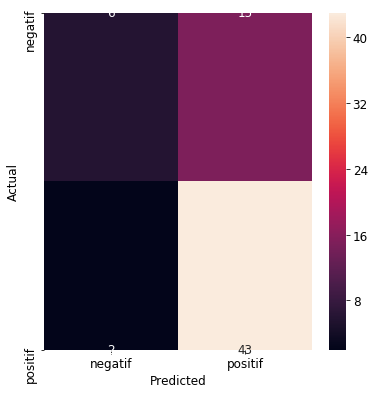

In [395]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, pred)
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(conf_mat, annot=True,
            xticklabels=kategori_id_data.Kategori.values, yticklabels=kategori_id_data.Kategori.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('gambarplot.png', transparent='True')
plt.show()

In [396]:
import pickle
filename = 'rpoli.sav'
pickle.dump(svm1, open(filename, 'wb'))
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7424242424242424


In [397]:
data.head()

,Data,Kategori,kategori_id
0,RT Yg penerbangan durasi sejaman dikasi roti g...,negatif,0
1,Kerjaan gue membutuhkan pindah2 kota biasanya ...,positif,1
2,Salah satunya penghargaan Best Cabin Crew Makl...,positif,1
3,terimakasih selama penerbangan jadi engga bose...,positif,1
4,Walaupun udah lama ga naik pesawat ngerasakan ...,positif,1


In [398]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(norm=None, encoding='latin-1', ngram_range=(1, 1), smooth_idf=False, tokenizer=None, analyzer = 'word', stop_words=stopwordplus)

features = tfidf.fit_transform(data.Data).toarray()
labels = data.kategori_id
features.shape

(329, 1077)

In [399]:
pd.DataFrame(features)

,0,1,2,3,4,5,6,7,8,9,...,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.29955,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0


In [400]:
tfidf.get_feature_names()

['000',
 '01',
 '02',
 '05',
 '10',
 '1000',
 '100rb',
 '10kg',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '1minggu',
 '20',
 '2020',
 '207',
 '22',
 '25',
 '28',
 '28h',
 '29a',
 '2thn',
 '30',
 '305',
 '31',
 '35',
 '3x',
 '40',
 '439',
 '45',
 '47',
 '48',
 '50',
 '500rb',
 '612',
 '647',
 '71',
 '71st',
 '71th',
 '800',
 '80ribu',
 '873',
 '981',
 'abis',
 'ac',
 'aceh',
 'addie',
 'adem',
 'adi',
 'admin',
 'aero',
 'agent',
 'ah',
 'air',
 'airbus',
 'airbusnya',
 'airbuss',
 'airline',
 'airlines',
 'airport',
 'aja',
 'akal',
 'akun',
 'albumnya',
 'alesan',
 'alhamdulillah',
 'alihkan',
 'allhamdulillah',
 'amaze',
 'ambon',
 'amdeus',
 'ampamsterdam',
 'ampat',
 'amq',
 'ams',
 'amsterdam',
 'and',
 'android',
 'anniversary',
 'apa2an',
 'apanya',
 'aplikasi',
 'aplimasi',
 'app',
 'appreciate',
 'apps',
 'appsmu',
 'appsnya',
 'apresiasi',
 'aqua',
 'arah',
 'aseli',
 'ashiaap',
 'asia',
 'at',
 'ata',
 'atambua',
 'ato',
 'audio',
 'australia',
 'awak',

##### (b) Menggunakan model dengan kernel rbf

In [401]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

model = LinearSVC()

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [403]:
import pickle
filename = 'rbf2_nov_w3.sav'
pickle.dump(model, open(filename, 'wb'))
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.803030303030303


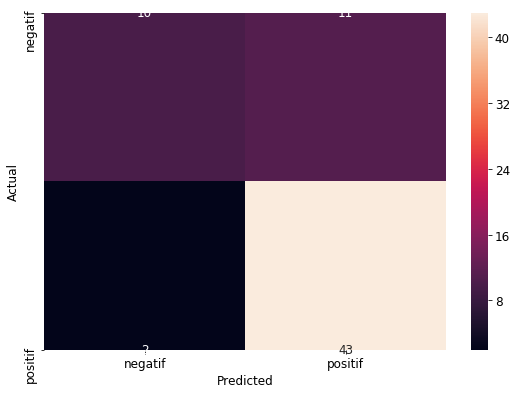

In [404]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=kategori_id_data.Kategori.values, yticklabels=kategori_id_data.Kategori.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('gambarplotrbf.png', transparent='True')
plt.show()

##### (c) Menggunakan model dengan kernel Polynomial

In [405]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

def train_svm(X_train, y_train):
    """
    Create and train the Support Vector Machine.
    """
    svm = SVC(kernel='poly')
    svm.fit(X_train, y_train)
    return svm
# Create and train the Support Vector Machine

svm = train_svm(X_train, y_train)

# Make an array of predictions on the test set
pred1 = svm.predict(X_test)

In [406]:
import pickle
filename = 'rpoli.sav'
pickle.dump(svm, open(filename, 'wb'))
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.6818181818181818


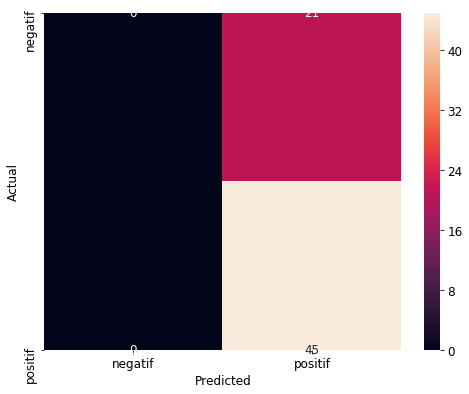

In [407]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, pred1)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=kategori_id_data.Kategori.values, yticklabels=kategori_id_data.Kategori.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('gambarplot.png', transparent='True')
plt.show()

##### (d) Menggunakan model dengan kernel sigmoid

In [408]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

def train_svm(X_train, y_train):
    """
    Create and train the Support Vector Machine.
    """
    svm = SVC(kernel='sigmoid')
    svm.fit(X_train, y_train)
    return svm
# Create and train the Support Vector Machine

svm2 = train_svm(X_train, y_train)

# Make an array of predictions on the test set
pred2 = svm2.predict(X_test)

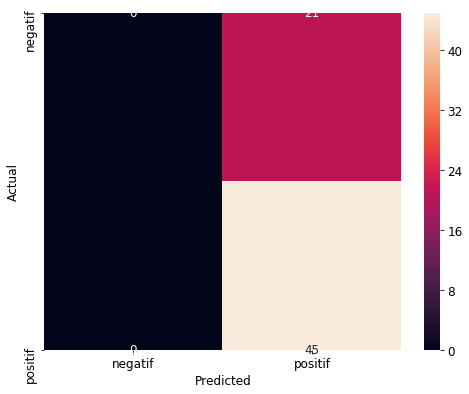

In [409]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, pred2)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=kategori_id_data.Kategori.values, yticklabels=kategori_id_data.Kategori.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('gambarplot.png', transparent='True')
plt.show()

In [410]:
import pickle
filename = 'rpoli.sav'
pickle.dump(svm2, open(filename, 'wb'))
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.6818181818181818


In [351]:
import pandas as pd
import csv

In [287]:
text4 = pd.read_csv('uji.csv')
text4

FileNotFoundError: [Errno 2] File b'uji.csv' does not exist: b'uji.csv'

In [68]:
names = text4.text
names

0    pelayanan hari ini akan di muali jam 8.00
1            garuda indonesia jam 8 ke jakarta
Name: text, dtype: object

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

model = LinearSVC()

In [70]:
texts = names
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
#predictions2 = loaded_model2.predict(text_features)
with open('uji.csv','w',newline='') as f1:
    writer=csv.writer(f1)
    for text, predicted in zip(texts, predictions):
        row = ('{}'.format(text),'{}'.format(id_to_kategori[predicted]))
        writer.writerow(row)
  #print("  - Prediksi: '{}'".format(id_to_kategori[predicted]))

NotFittedError: This LinearSVC instance is not fitted yet

##### (14) Memprediksi data baru dari model kernel rbf (model terbaik)

In [412]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

model = LinearSVC()

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [413]:
texts = ["1) delay",
         "2) terimakasi",
         "3) baik",
         "4) rusak",
         "5) buruk",
         "6) pelayanan",
         "7) makanan",
         "8) puas",
         "9) payah"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Prediksi: '{}'".format(id_to_kategori[predicted]))
  print("")

"1) delay"
  - Prediksi: 'negatif'

"2) terimakasi"
  - Prediksi: 'positif'

"3) baik"
  - Prediksi: 'positif'

"4) rusak"
  - Prediksi: 'negatif'

"5) buruk"
  - Prediksi: 'positif'

"6) pelayanan"
  - Prediksi: 'positif'

"7) makanan"
  - Prediksi: 'positif'

"8) puas"
  - Prediksi: 'positif'

"9) payah"
  - Prediksi: 'positif'



##### (15) Evaluasi Model Klasifikasi

In [414]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=data['Kategori'].unique()))

              precision    recall  f1-score   support

     negatif       0.83      0.48      0.61        21
     positif       0.80      0.96      0.87        45

    accuracy                           0.80        66
   macro avg       0.81      0.72      0.74        66
weighted avg       0.81      0.80      0.79        66



In [185]:
!pip install wordcloud

##### (16) Woedclous Kata Terpopuler

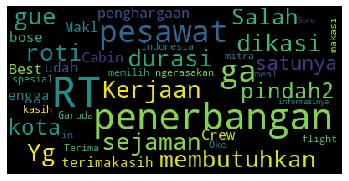

In [290]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud

#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords(),
                          max_words=40,
                          max_font_size=50, 
                          random_state=10
                         ).generate(str(data['Data']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word5.png", dpi=1500)